In [1]:
import os
import csv
import xarray
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read segment COMID CSV file
COMID = []
with open('COMID.csv') as f:
    for row in csv.reader(f):
        COMID.append(row[0])

In [3]:
ds = xarray.open_dataset('hydroprop-fulltable.nc')

In [4]:
df = ds.to_dataframe()

In [5]:
df.head()

,CatchId,Stage,NumCells,SurfaceArea,BedArea,Volume,SLOPE,LENGTHKM,AREASQKM,Roughness,TopWidth,WettedPerimeter,WetArea,HydraulicRadius,Discharge
index,,,,,,,,,,,,,,,
0,19679365,0.0000,427,37108.229365,37110.131936,0.000000,0.005133,3.945,4.9545,0.05,9.406395,9.406878,0.000000,0.000000,0.000000
1,19679365,0.3048,481,41801.091635,41804.123018,11921.873035,0.005133,3.945,4.9545,0.05,10.595967,10.596736,3.022021,0.285184,1.876145
2,19679365,0.6096,662,57530.763955,57550.358546,26564.035362,0.005133,3.945,4.9545,0.05,14.583210,14.588177,6.733596,0.461579,5.762748
3,19679365,0.9144,1042,90554.491880,90632.696208,48894.018637,0.005133,3.945,4.9545,0.05,22.954244,22.974067,12.393921,0.539474,11.769044
4,19679365,1.2192,1597,138786.386462,138979.232138,83528.429226,0.005133,3.945,4.9545,0.05,35.180326,35.229210,21.173239,0.601014,21.607051


In [6]:
# No. of catchments or flow segments
len(df.CatchId.unique())

2638933

In [7]:
# Groupby CatchId. This should return number of groups equal to the number of the flow segments
grpd = df.groupby('CatchId')
len(grpd)

2638933

In [ ]:
grpd.count().head()

In [ ]:
# Select on the first 50 groups to plot due to memory issue
#selected_grpd = pd.concat( [ grpd.get_group(group) for i,group in enumerate( grpd.groups) if i < 15 ] ).groupby('CatchId')

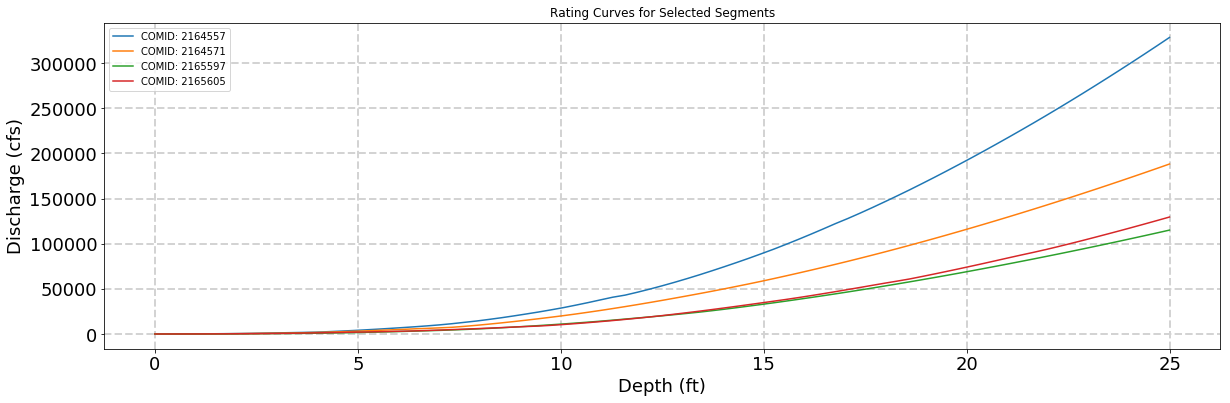

In [8]:
# Plot All Rating Curves on the same plot

figsize=(20,6)
fontsize=18

fig,  ax = plt.subplots(figsize=figsize)
ax.set_xlabel('Depth (ft)', fontsize=fontsize)
ax.set_ylabel('Discharge (cfs)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.grid(which='major', color='lightgrey', linestyle='--', linewidth=2)


#for name, data in selected_grpd:
for name in COMID:
    data = grpd.get_group(int(name))
    
    ax.plot(data.Stage.values, data['Discharge'].values, label = "COMID: " + name)
    

ax.set_title("Rating Curves for Selected Segments")

ax.legend()